In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('wine.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [3]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [4]:
data = df.copy()
label = df.copy()
data = data[['ash','magnesium']]
label = label['label']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ash        178 non-null    float64
 1   magnesium  178 non-null    float64
dtypes: float64(2)
memory usage: 2.9 KB


In [6]:
label.count()

178

In [7]:
label.unique()

array([0, 1, 2])

In [8]:
clf = KMeans(n_clusters=3)
res = clf.fit(data).labels_
res

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0], dtype=int32)

In [9]:
label

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: label, Length: 178, dtype: int64

In [10]:
accuracy_score(res, label)

0.34269662921348315

In [11]:
data['label'] = label
data['res'] = res

In [12]:
from matplotlib import pyplot as plt

In [13]:
data.iloc[:,0]

0      2.43
1      2.14
2      2.67
3      2.50
4      2.87
       ... 
173    2.45
174    2.48
175    2.26
176    2.37
177    2.74
Name: ash, Length: 178, dtype: float64

Text(0, 0.5, 'magnesium')

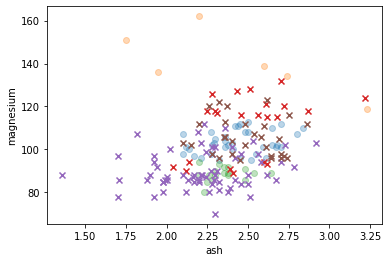

In [14]:
plt.scatter(x=data[(data['label']==data['res']) & (data['label']==0)].iloc[:,0], y=data[(data['label']==data['res']) & (data['label']==0)].iloc[:,1], alpha=0.3)
plt.scatter(x=data[(data['label']==data['res']) & (data['label']==1)].iloc[:,0], y=data[(data['label']==data['res']) & (data['label']==1)].iloc[:,1], alpha=0.3)
plt.scatter(x=data[(data['label']==data['res']) & (data['label']==2)].iloc[:,0], y=data[(data['label']==data['res']) & (data['label']==2)].iloc[:,1], alpha=0.3)

plt.scatter(x=data[(data['label']!=data['res']) & (data['label']==0)].iloc[:,0], y=data[(data['label']!=data['res']) & (data['label']==0)].iloc[:,1], marker='x')
plt.scatter(x=data[(data['label']!=data['res']) & (data['label']==1)].iloc[:,0], y=data[(data['label']!=data['res']) & (data['label']==1)].iloc[:,1], marker='x')
plt.scatter(x=data[(data['label']!=data['res']) & (data['label']==2)].iloc[:,0], y=data[(data['label']!=data['res']) & (data['label']==2)].iloc[:,1], marker='x')

plt.xlabel('ash')
plt.ylabel('magnesium')